In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('MindReader.csv')
df.head()

,date,mode,experts,username,result,score,ip,movesPlayer,movesComp,times
0,0,original,"[u'varTreePY', u'varTreeY']",anonymous,Loser,-1,77.49.249.182,"[1L, 0L, 0L, 0L, 1L, 1L, 0L, 1L, 1L, 0L, 0L, 0...","[1L, 1L, 1L, 1L, 0L, 0L, 1L, 0L, 0L, 0L, 1L, 1...","[1453367217782L, 1453367219014L, 1453367220022..."
1,2016-01-23 13:02:48.784250,original,"[u'varTreePY', u'varTreeY']",anonymous,Restart,1,77.49.249.182,[3L],[3L],[0L]
2,2016-01-23 13:04:00.022240,original,"[u'varTreePY', u'varTreeY']",anonymous,Loser,-28,77.49.249.182,"[1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 0L, 0L, 0...","[1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 0L, 0...","[0L, 84L, 39L, 16L, 16L, 16L, 49L, 16L, 17L, 7..."
3,2016-01-23 13:06:33.513500,original,"[u'varTreePY', u'varTreeY']",anonymous,Cheater,40,77.49.249.182,"[1L, 0L, 0L, 1L, 0L, 1L, 1L, 1L, 0L, 1L, 0L, 1...","[1L, 1L, 1L, 0L, 1L, 0L, 0L, 0L, 1L, 1L, 0L, 1...","[0L, 62L, 21L, 30L, 24L, 17L, 72L, 80L, 64L, 3..."
4,2016-01-23 13:06:47.391410,original,"[u'varTreePY', u'varTreeY']",anonymous,Restart,-3,77.49.249.182,"[1L, 1L, 0L, 0L, 1L, 1L, 0L, 1L, 1L]","[1L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 1L]","[0L, 47L, 43L, 41L, 37L, 41L, 40L, 42L, 34L]"


In [3]:
df.groupby('result').count()

,date,mode,experts,username,score,ip,movesPlayer,movesComp,times
result,,,,,,,,,
Cheater,43,43,43,43,43,43,43,43,43
Hacker,8,8,8,8,8,8,8,8,8
Loser,1409,1409,1409,1409,1409,1409,1409,1409,1409
Restart,1033,1033,1033,1033,1033,1033,1033,1033,1033
TimeOut,437,437,437,437,437,437,437,437,437
Winner,293,293,293,293,293,293,293,293,293


In [4]:
winLose=df[(df['result'] =='Winner') | (df['result'] =='Loser')]
winLose=np.sort(winLose['score'])

## Performance for random coin flip strategy

Let $c$ be the number of car advances by the computer, let $r$ be the number of car advances by a random coin flip strategy. $\max(c,r)=100$ and we are interested in the distribution of $r-c$.

This process is a random walk with absorbing boundaries at $r=100$ and $c=100$

Define a function $P(t,g)$ where $t=c+r$ and $g=r-c$. 

Clearly $r=\frac{g+t}{2}$ and $c=\frac{t-g}{2}$

For a given value of $t$, $P(t,g)$ defines a probability over $g$.

for $t=0$ we have $P(0,0)=1$ and $P(0,g)=0$ for $g \neq 0$

for $t=1,2,..200$

1. $$ P(t,g)= \frac{P(t-1,g+1)+P(t-1,g-1)}{2} $$
2. For $c=100$ -- $t-g=200$ -- $g=t-200$ and for $r=100$ - $g+t=200$ - $g=200-t$ set $F(g)=P(t,g)$ then set $P(t,g)=0$



201 201


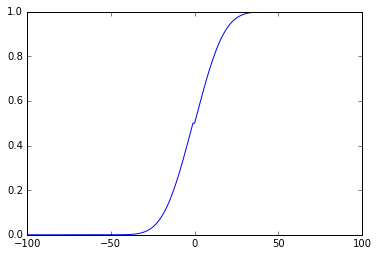

In [41]:
from math import factorial
P=np.zeros([201,201])
F=np.zeros([201,1])

P[0,100]=1;

for t in range(1,201):
    for g in range(1,200):
        P[t,g]=(P[t-1,g-1]+P[t-1,g+1])/2.0;
        if t-(g-100)==200 or t+(g-100)==200:
            F[g]=P[t,g]
            P[t,g]=0
        
x=range(-100,101)
plot(x,cumsum(F))
print len(F),len(x)

In [40]:
P[0:5,97:103]

array([[ 0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.5  ,  0.   ,  0.5  ,  0.   ],
       [ 0.   ,  0.25 ,  0.   ,  0.5  ,  0.   ,  0.25 ],
       [ 0.125,  0.   ,  0.375,  0.   ,  0.375,  0.   ],
       [ 0.   ,  0.25 ,  0.   ,  0.375,  0.   ,  0.25 ]])

The bump at around 0 is because a draw ($g=0) is impossible in this game 

### Comparison with random strategy
THe figures below show that humans almost always perform worse than random guessing.We ccome to this conclusion by comparing the comparing the empirical CDF with the CDF calculated for the strategy that generates 0,1 independently at random with probabilities 1/2,1/2.

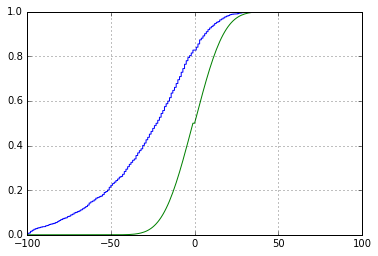

In [42]:
L=len(winLose)
plot(winLose,arange(0,1,1./L),x,cumsum(F))
grid()

[ 28  28  29  30  31  31  33  37  76 100] 1702 0.000587544065805


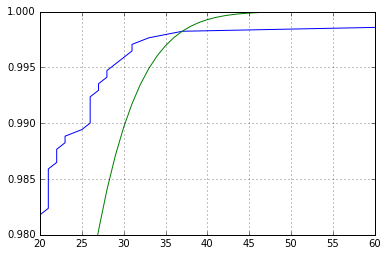

In [44]:
plot(winLose,arange(0,1,1./L),x,cumsum(F))
print winLose[-10:],L,1.0/L
xlim([20,60])
ylim([0.98,1])
grid()

### Outliers
The cross-over between the graphs occurs at about 37. It is clear from this graph that the two highest scores 76 and 100, are probably cheats.

It would be interesting to show the user where they are in terms of top percentile when compared with the other users, and when compared with the random strategy. Basically, the figure shows that scores higher than 45 are extremely unlikely if you are using a randomized strategy, so one can see it as evidence that you are doing better than random.